### Phân tích bài viết và số lượng tương tác

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('cleanCorgi.csv')
df = df.drop(columns='Unnamed: 0')
df['image'] = df['image'].fillna(0)
df['video'] = df['video'].fillna(0)
df['reactors'] = df['reactors'].replace('[]','Đã ẩn người dùng')
df['comments_full'] = df['comments_full'].replace('[]','Đã ẩn comments')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_id         104 non-null    int64 
 1   text            104 non-null    object
 2   reactions       104 non-null    object
 3   reaction_count  104 non-null    int64 
 4   comments        104 non-null    int64 
 5   reactors        104 non-null    object
 6   comments_full   104 non-null    object
 7   shares          104 non-null    int64 
 8   time            104 non-null    object
 9   timestamp       104 non-null    int64 
 10  image           104 non-null    object
 11  video           104 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.9+ KB


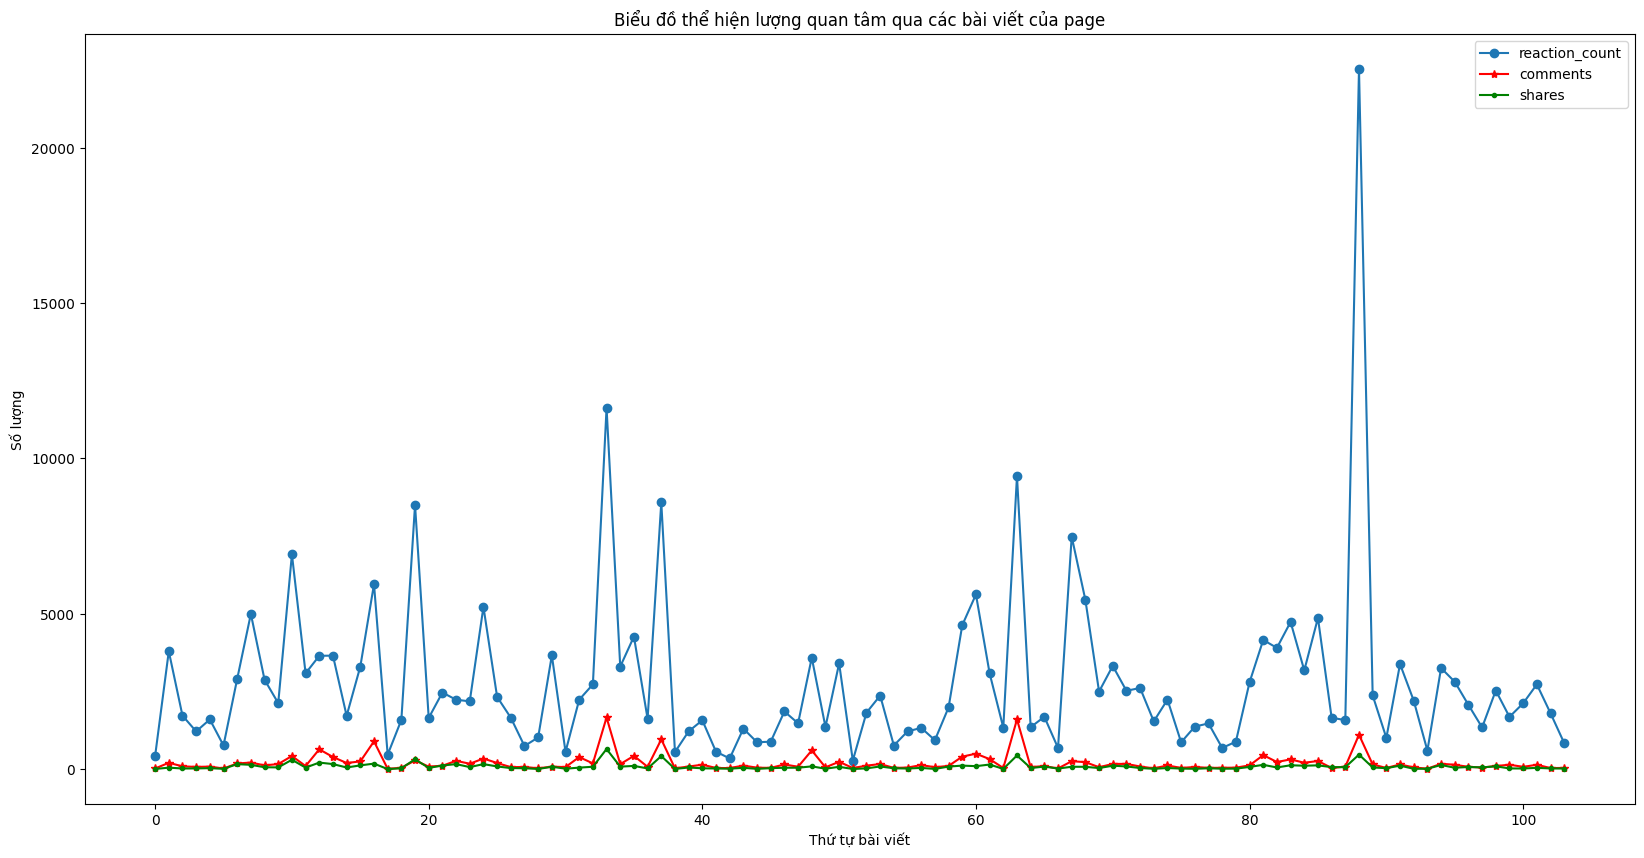

In [62]:
# phân tích tương tác của 100 bài viết để xem coi bài viết nào có nhiều lượt tương tác nhất, nội dung bài viết đó là gì
fig, ax = plt.subplots(figsize=(20, 10))
df['reaction_count'].plot(kind='line', marker= 'o')
df['comments'].plot(kind= 'line', color = 'red', marker= '*')
df['shares'].plot(kind= 'line', color = 'green', marker= 'o', markersize = 3)
plt.title('Biểu đồ thể hiện lượng quan tâm qua các bài viết của page')
plt.xlabel('Thứ tự bài viết')
plt.ylabel('Số lượng')
plt.legend()


In [63]:
# lấy ra bài viết có tương tác cao nhất, có nhiều comments nhất, có nhiều lượt shares nhất
print(df.nlargest(1, 'reaction_count')[['text', 'reaction_count', 'time']])
print(df.nlargest(1, 'comments')[['text', 'comments', 'time']])
print(df.nlargest(1, 'shares')[['text', 'shares', 'time']])

                                                 text  reaction_count  \
88  Em nhỡ mồm anh cho em xin lỗi, em run lắm rồi ...           22537   

                   time  
88  2023-06-30 12:30:43  
                                                 text  comments  \
33  Tập luyện múa lân chuẩn bị cho tết trung thu m...      1662   

                   time  
33  2023-08-29 15:31:09  
                                                 text  shares  \
33  Tập luyện múa lân chuẩn bị cho tết trung thu m...     645   

                   time  
33  2023-08-29 15:31:09  


In [64]:
df.nlargest(1, 'reaction_count')

,post_id,text,reactions,reaction_count,comments,reactors,comments_full,shares,time,timestamp,image,video
88,598355935758703,"Em nhỡ mồm anh cho em xin lỗi, em run lắm rồi ...","{'thích': 8855, 'yêu thích': 180, 'haha': 1332...",22537,1105,Đã ẩn người dùng,"[{'comment_id': '592311186413584', 'comment_ur...",466,2023-06-30 12:30:43,1688103043,0,https://scontent.fthd1-1.fna.fbcdn.net/v/t42.1...


In [65]:
x = df.nlargest(1, 'comments')
x['comments_full'].iloc[0]

"[{'comment_id': '1655714148245569', 'comment_url': 'https://facebook.com/1655714148245569', 'commenter_id': '100009294534288', 'commenter_url': 'https://facebook.com/profile.php?id=100009294534288&eav=AfYzfwkZf_pL8Ud7Ti4g9f67RVQMm1rfcSQlxLmaQGDN6cyHsfHuDvys2E0W6yl0ANk&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Phương Tran', 'commenter_meta': None, 'comment_text': 'Lưu Thị Quỳnh Tiên', 'comment_time': datetime.datetime(2023, 9, 12, 0, 0), 'comment_image': None, 'comment_reactors': [], 'comment_reactions': None, 'comment_reaction_count': None, 'replies': [{'comment_id': '2301472593392419', 'comment_url': 'https://facebook.com/2301472593392419', 'commenter_id': '100050310422858', 'commenter_url': 'https://facebook.com/quynhtien.luuthi?eav=AfaOuXiZ_zVpf-pUOCupoEbq7ic_NibSkcMZkx7JyWnyWXoCOHeeLX8Upc0NNTrLNyg&fref=nf&rc=p&__tn__=R&paipv=0', 'commenter_name': 'Lưu Thị Quỳnh Tiên', 'commenter_meta': None, 'comment_text': 'Phương Tran kaka', 'comment_time': datetime.datetime(20

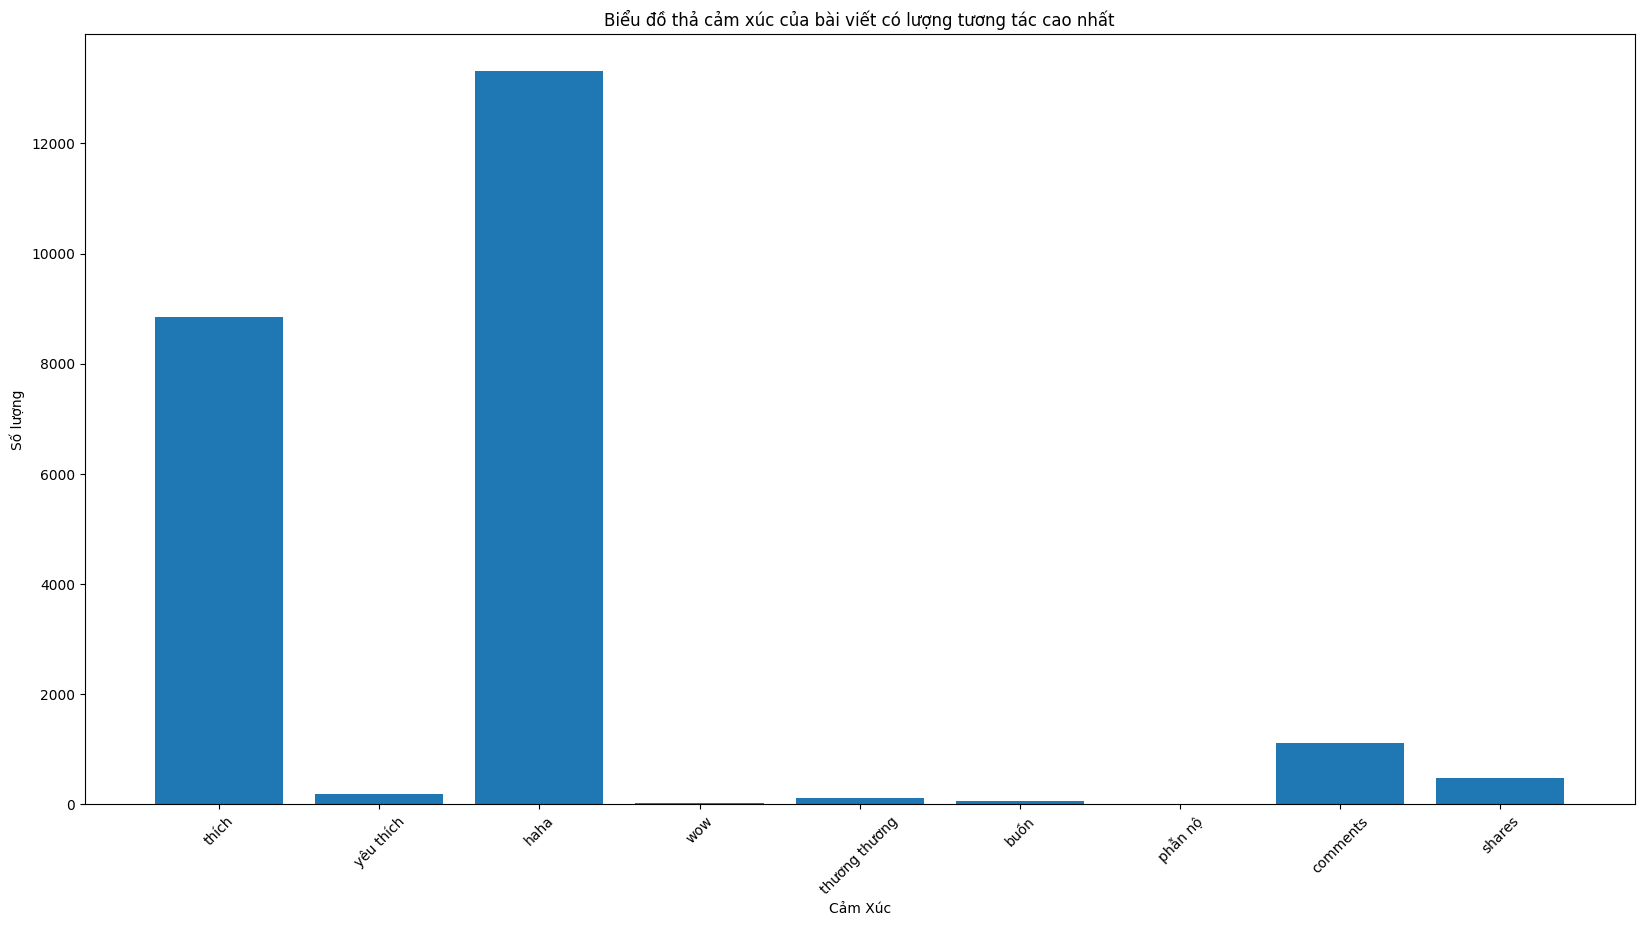

In [66]:
df_max_reactions = df.nlargest(1,'reaction_count')
# thống kê reactions của bài viết này
max_reactions = dict(eval(df_max_reactions['reactions'].iloc[0]))
max_reactions['comments'] = df_max_reactions['comments'].iloc[0]
max_reactions['shares'] = df_max_reactions['shares'].iloc[0]

plt.figure(figsize=(20, 10))
x = list(max_reactions.keys())
y = list(max_reactions.values())
plt.title('Biểu đồ thả cảm xúc của bài viết có lượng tương tác cao nhất')
plt.bar(x,y)
plt.xlabel('Cảm Xúc')
plt.ylabel('Số lượng')
plt.xticks(rotation = 45);

In [67]:
# tạo một dataframe để tránh mất dữ liệu của df gốc
new_df = df
new_df['reactions'] = new_df['reactions'].apply(lambda x : dict(eval(x)))
new_df_reactions = new_df['reactions'].apply(pd.Series)
new_df_reactions_full = pd.concat([new_df, new_df_reactions], axis=1)
new_df_reactions_full.fillna(0, inplace=True)
new_df_reactions_full[['text','thích', 'yêu thích', 'haha', 'thương thương', 'wow','buồn', 'phẫn nộ']]

,text,thích,yêu thích,haha,thương thương,wow,buồn,phẫn nộ
0,Bé bé bằng bông hai mông phồng phồng 🤭🥰,263.0,75.0,74.0,8.0,0.0,0.0,0.0
1,"Bắt được con tiểu tam hú hí với chồng bà, còn ...",1569.0,47.0,2153.0,11.0,4.0,7.0,1.0
2,"Em vượt cạn thành công rồi mọi người à, Mệt mà...",1241.0,313.0,16.0,152.0,0.0,0.0,0.0
3,"Cuối tuần rồi relax thôi nào, thả trôi kệ xừ đ...",667.0,135.0,386.0,22.0,3.0,0.0,0.0
4,"Cho em ra khỏi đây SEN ơi, ở đây lạnh quá em r...",1009.0,96.0,462.0,29.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
99,Có biết đây là cái áo tao thích nhất không? Cò...,607.0,14.0,1049.0,5.0,1.0,5.0,0.0
100,"Cái kết cho kẻ thứ ba, nhưng mà đằng sau có j ...",952.0,41.0,1108.0,9.0,0.0,8.0,0.0
101,"Việc gì cũng đến tay tao, bực lắm rồi đấy SEN ...",1174.0,59.0,1460.0,22.0,2.0,9.0,1.0
102,Ai lông gà lông vịt lông uýt Corgi không? 😆\nX...,1422.0,106.0,257.0,14.0,0.0,0.0,0.0


thích            148676.0
yêu thích         20949.0
haha             114715.0
thương thương      3984.0
wow                 265.0
buồn               1102.0
phẫn nộ              80.0
dtype: float64


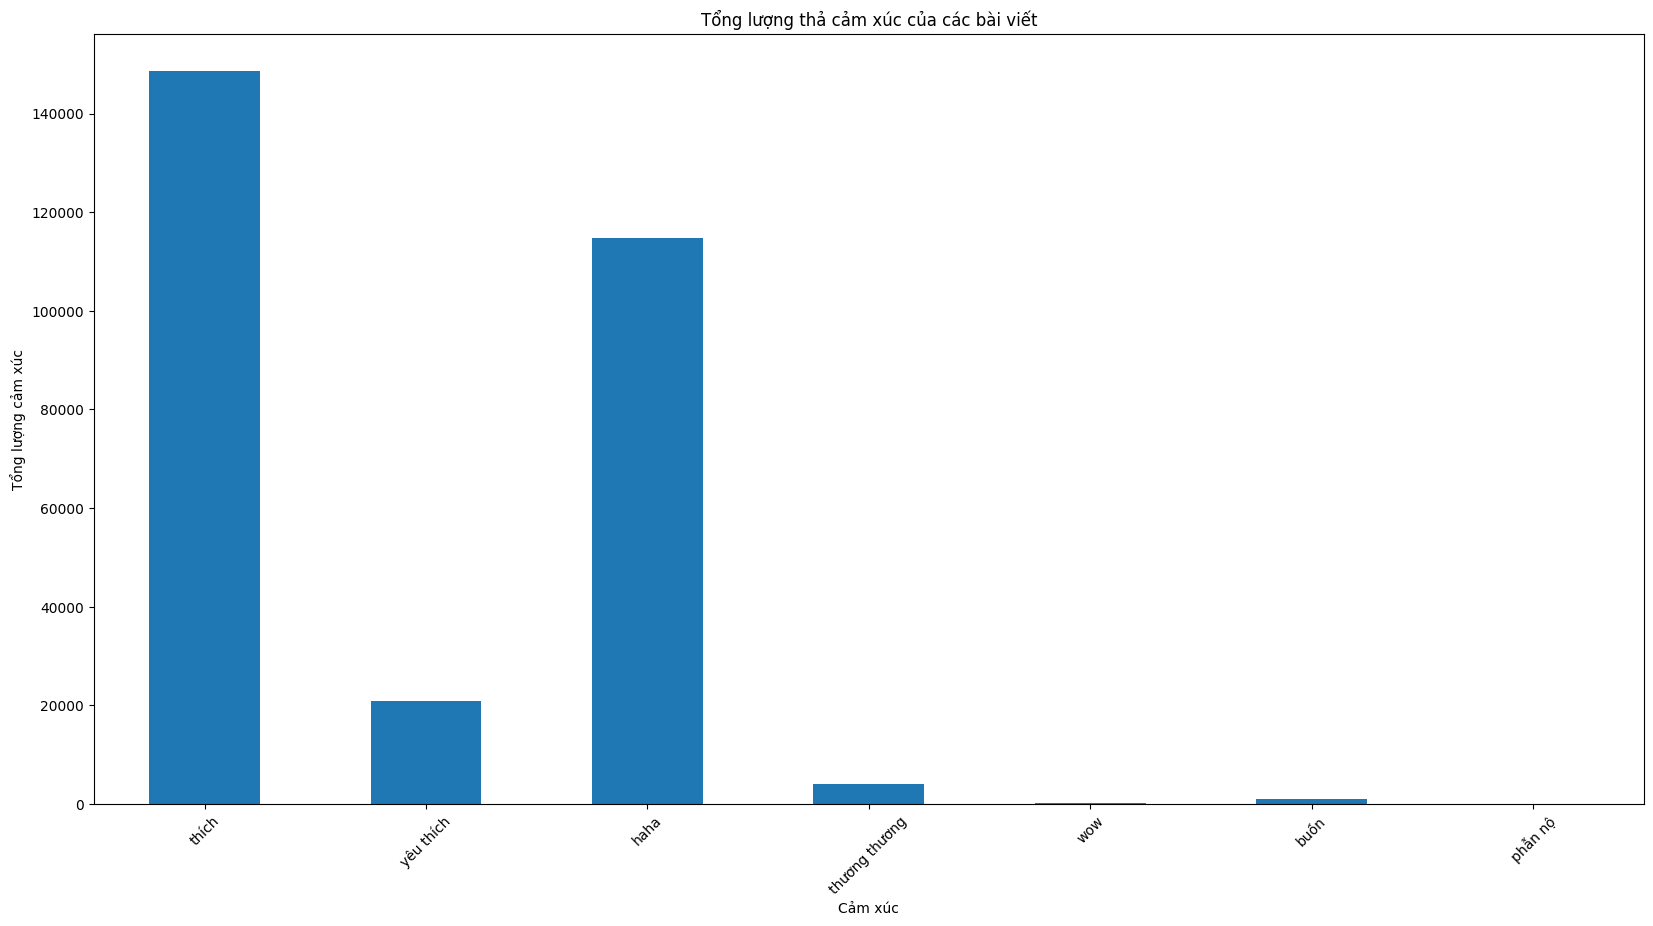

In [68]:
reactions_sum = new_df_reactions_full[['thích', 'yêu thích', 'haha', 'thương thương', 'wow','buồn', 'phẫn nộ']].sum()
print(reactions_sum)
reactions_sum.plot(kind='bar', rot = 45, figsize=(20, 10), xlabel='Cảm xúc', ylabel='Tổng lượng cảm xúc', title='Tổng lượng thả cảm xúc của các bài viết');

<Axes: title={'center': 'Biểu đồ thể hiện khung giờ đăng bài của Fanpage'}, xlabel='hour', ylabel='posts'>

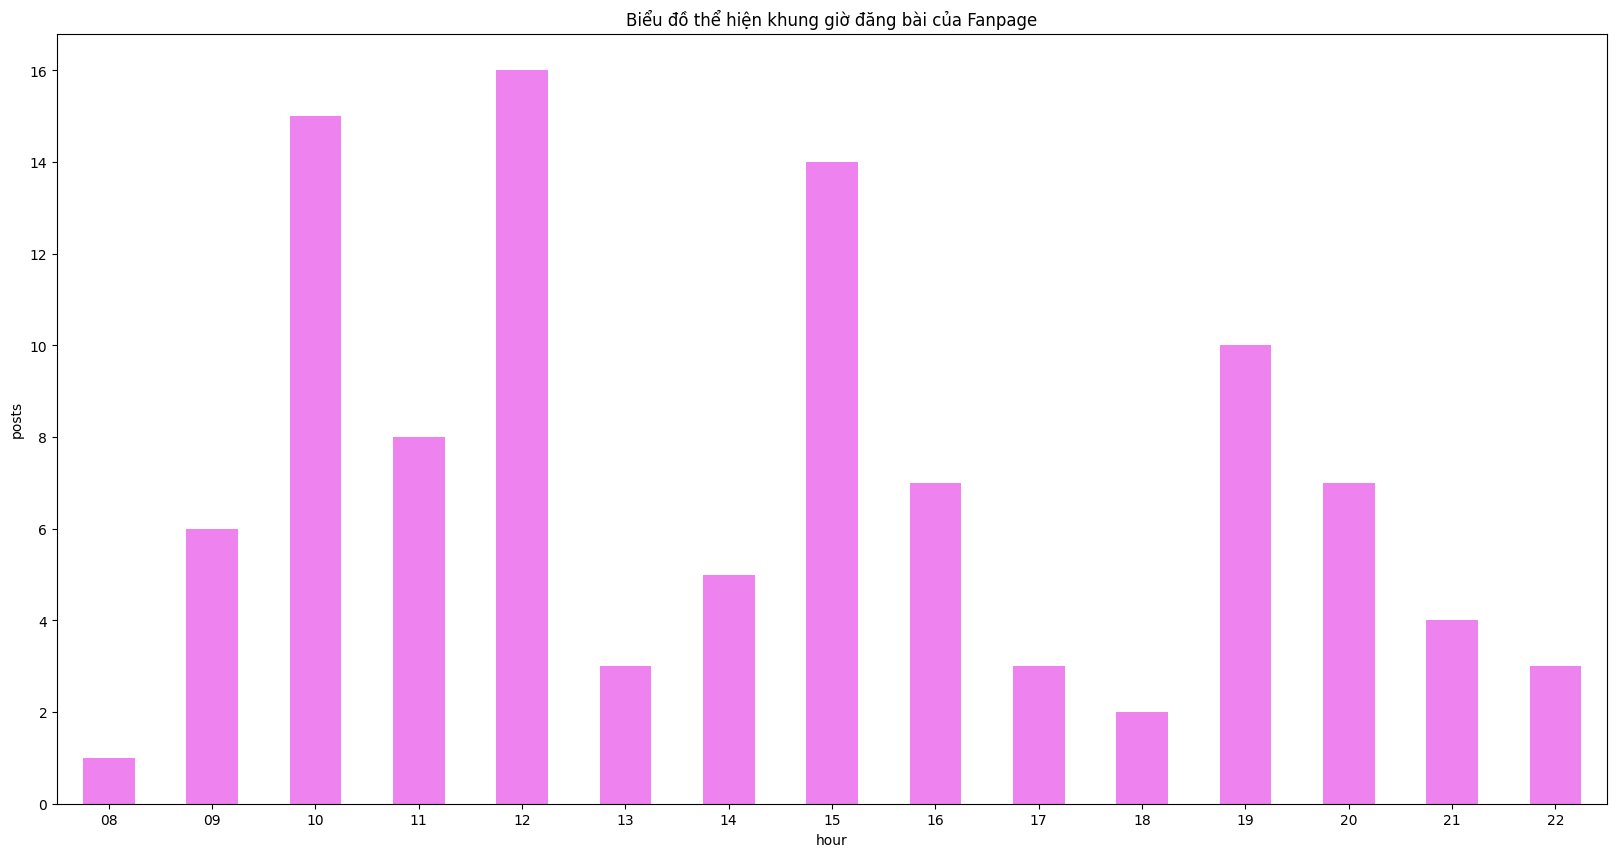

In [69]:
# phân tích thời gian đăng bài của page trong ngày
# tạo một cột hour từ cột time
plt.figure(figsize=(20, 10))
df['hour'] = df['time'].str[11:13]
df.groupby('hour').count()['post_id'].plot(kind= 'bar',ylabel = 'posts', title='Biểu đồ thể hiện khung giờ đăng bài của Fanpage', rot = 0,color = 'violet')


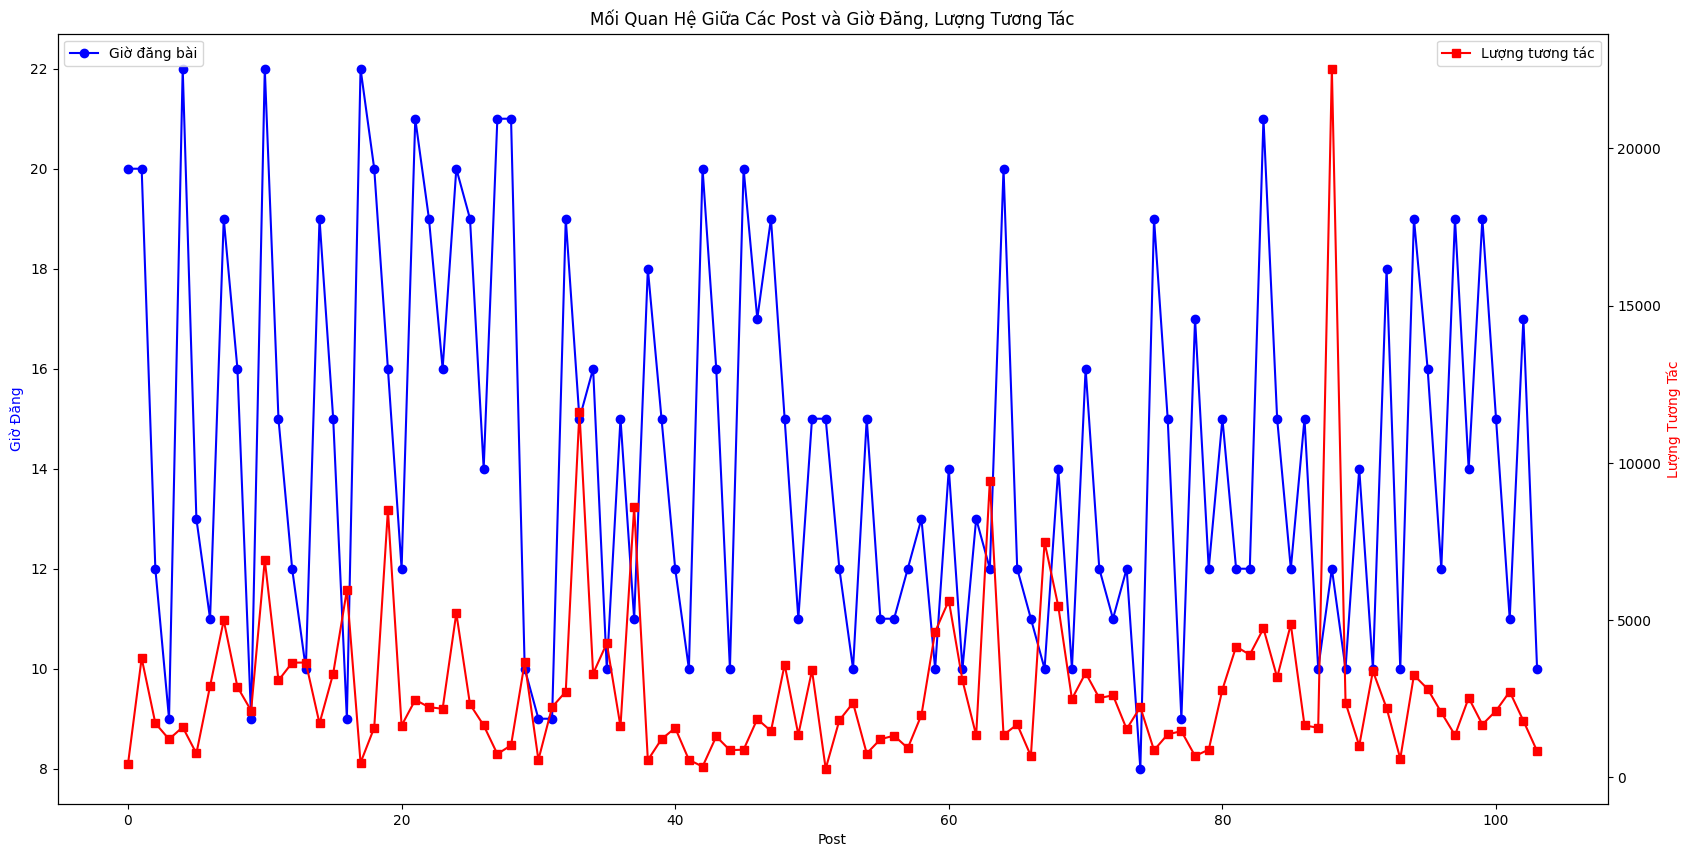

In [70]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
# vì giá trị hour được cắt từ chuỗi ra nên cần chuyển về dạng số khi vẽ đồ thị
x = [int(i) for i in list(df['hour'])]
# Biểu đồ đường thể hiện giờ đăng
ax1.plot([i for i in range(len(x))],x, label='Giờ đăng bài', marker='o', color='blue')

# Biểu đồ đường thể hiện lượng tương tác
ax2.plot(df['reaction_count'], label='Lượng tương tác', marker='s', color='red')

# Đặt tên cho trục và biểu đồ
ax1.set_xlabel('Post')
ax1.set_ylabel('Giờ Đăng', color='blue')
ax2.set_ylabel('Lượng Tương Tác', color='red')
plt.title('Mối Quan Hệ Giữa Các Post và Giờ Đăng, Lượng Tương Tác')

# Hiển thị chú thích
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [71]:
df.describe()

,post_id,reaction_count,comments,shares,timestamp
count,1.040000e+02,104.000000,104.000000,104.000000,1.040000e+02
mean,6.263665e+14,2786.259615,196.961538,78.865385,1.692669e+09
std,2.577711e+13,2820.542408,277.872357,102.522274,4.240107e+06
min,5.937051e+14,275.000000,8.000000,0.000000,1.687318e+09
25%,6.046102e+14,1333.000000,53.000000,21.000000,1.689028e+09
50%,6.211943e+14,2120.500000,108.500000,47.500000,1.691779e+09
75%,6.574374e+14,3306.250000,205.500000,90.250000,1.697790e+09
max,6.695822e+14,22537.000000,1662.000000,645.000000,1.699797e+09


<Axes: xlabel='month', ylabel='post'>

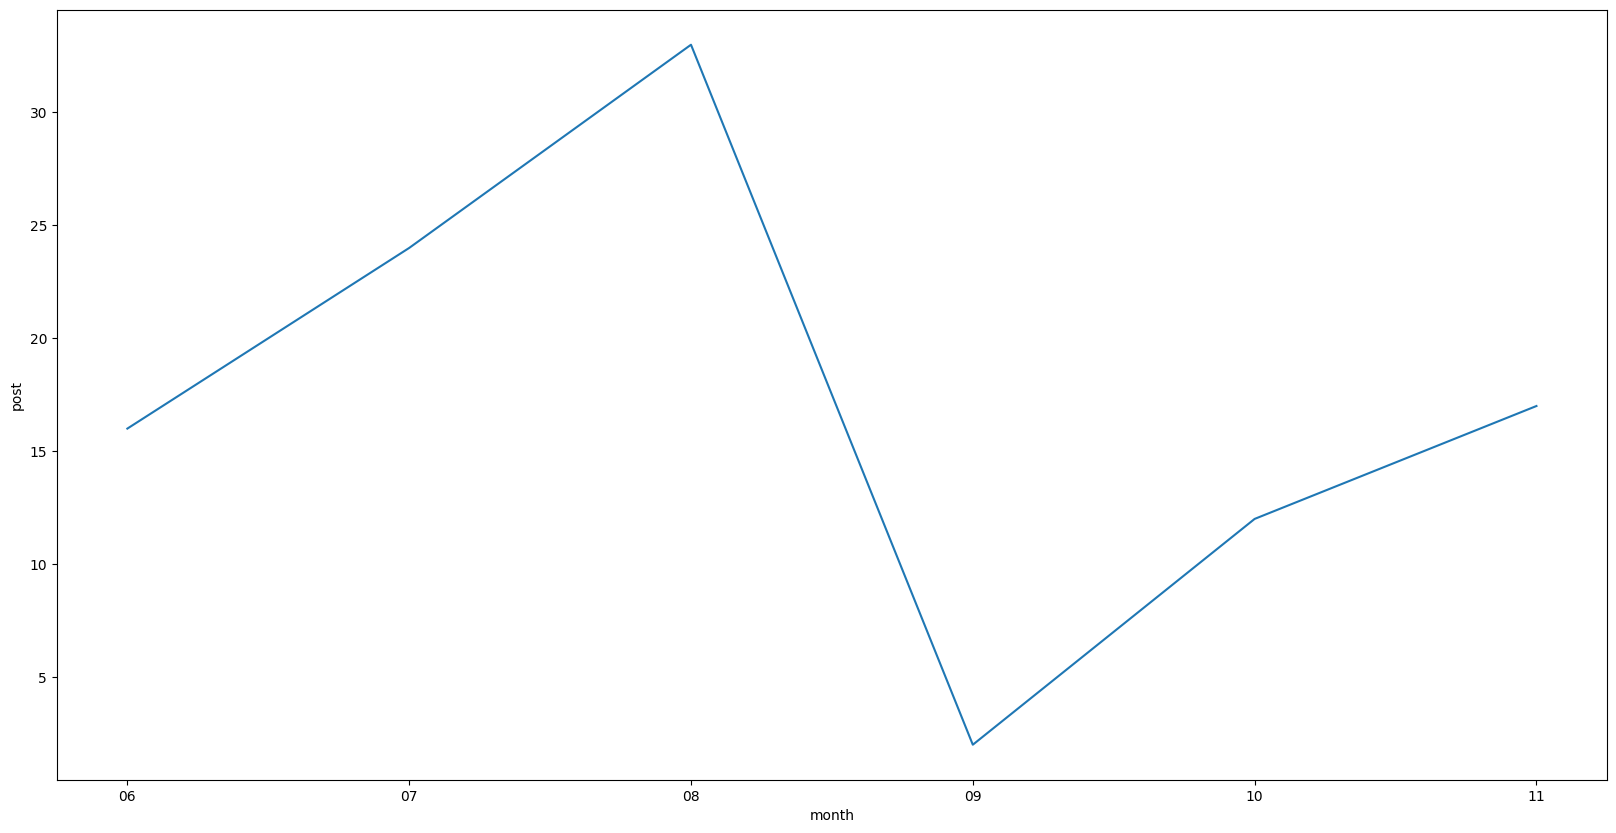

In [72]:
# phân tích về số bài đăng qua các tháng xem tháng nào có lượng bài đăng nhiều nhất, tần suất như thế nào
# tạo một cột mới chỉ chứa các tháng đăng bài
df['month'] = df['time'].str[5:7]
# lấy ra số lượng bài viết trong từng tháng
post_by_month = df.groupby('month').count()['post_id']
# vẽ biểu đồ so sánh lượng bài viết của các tháng
post_by_month.plot(kind='line', ylabel= 'post', figsize=(20, 10))

In [73]:
#lấy dữ liệu trung bình của toàn bộ lượt tương tác bao gồm reactions, comments, shares
post_reactions_mean = df.groupby('month')['reaction_count'].mean()
post_comments_mean = df.groupby('month')['comments'].mean()
post_shares_mean = df.groupby('month')['shares'].mean()


print(post_reactions_mean)
print(post_comments_mean)
print(post_shares_mean)

month
06    3328.375000
07    2645.416667
08    2669.787879
09    2108.500000
10    2503.250000
11    2980.470588
Name: reaction_count, dtype: float64
month
06    153.750000
07    133.041667
08    273.181818
09     71.500000
10    137.000000
11    237.000000
Name: comments, dtype: float64
month
06    73.875000
07    58.083333
08    88.181818
09    44.000000
10    85.583333
11    94.176471
Name: shares, dtype: float64


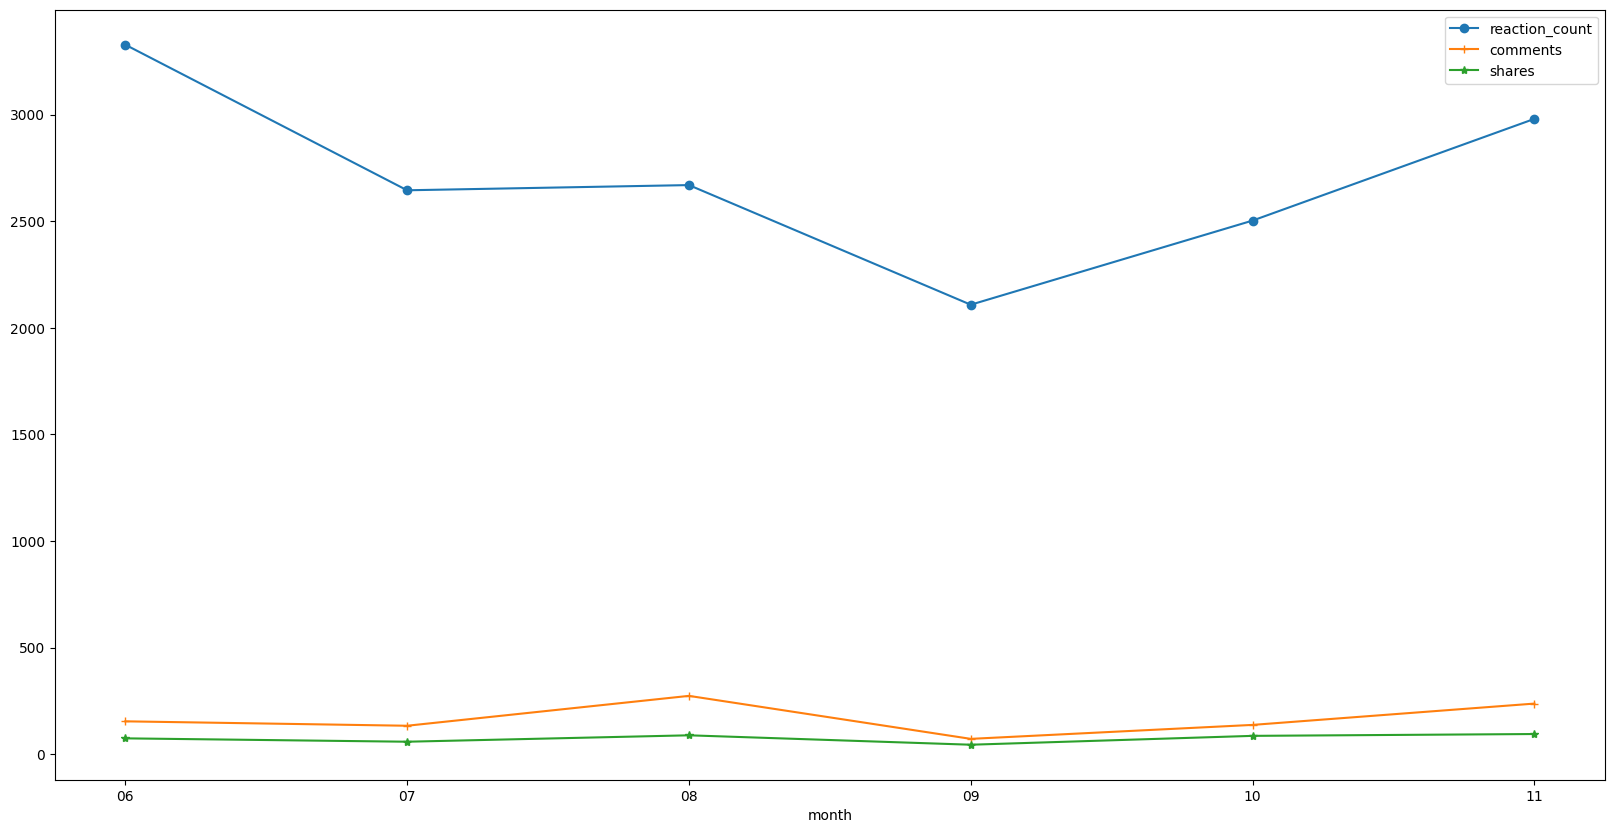

In [74]:
plt.figure(figsize=(20, 10))
post_reactions_mean.plot(kind= 'line', marker = 'o')
post_comments_mean.plot(kind= 'line', marker = '+')
post_shares_mean.plot(kind= 'line', marker = '*')
plt.legend();

In [75]:
df_image_isna = df[df['image'] == 0]
df_image_notna = df[df['image'] != 0]
df_video_isna = df[df['video'] == 0]
df_video_notna = df[df['video'] != 0]

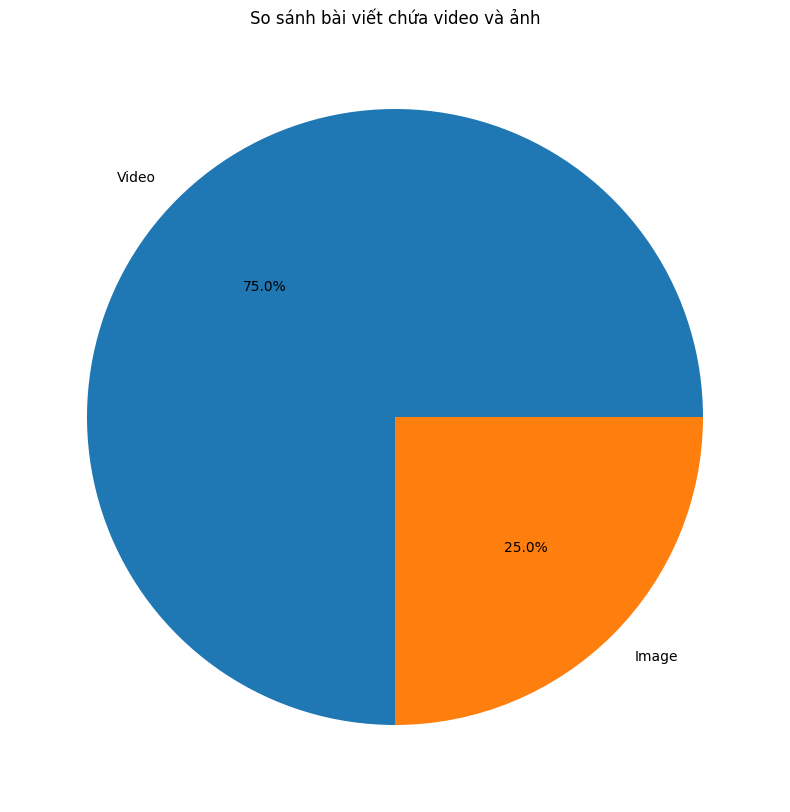

26 78


In [76]:
import matplotlib.pyplot as plt

# Số lượng bài viết chứa video và ảnh
count_video = df_video_notna['post_id'].count()
count_image = df_image_notna['post_id'].count()

# Labels và values
labels = ['Video', 'Image']
values = [count_video, count_image]

# Vẽ biểu đồ pie
plt.figure(figsize=(20, 10))
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Đặt tên biểu đồ và hiển thị
plt.title('So sánh bài viết chứa video và ảnh')
plt.show()
print(count_image, count_video)

2375.0
2923.346153846154


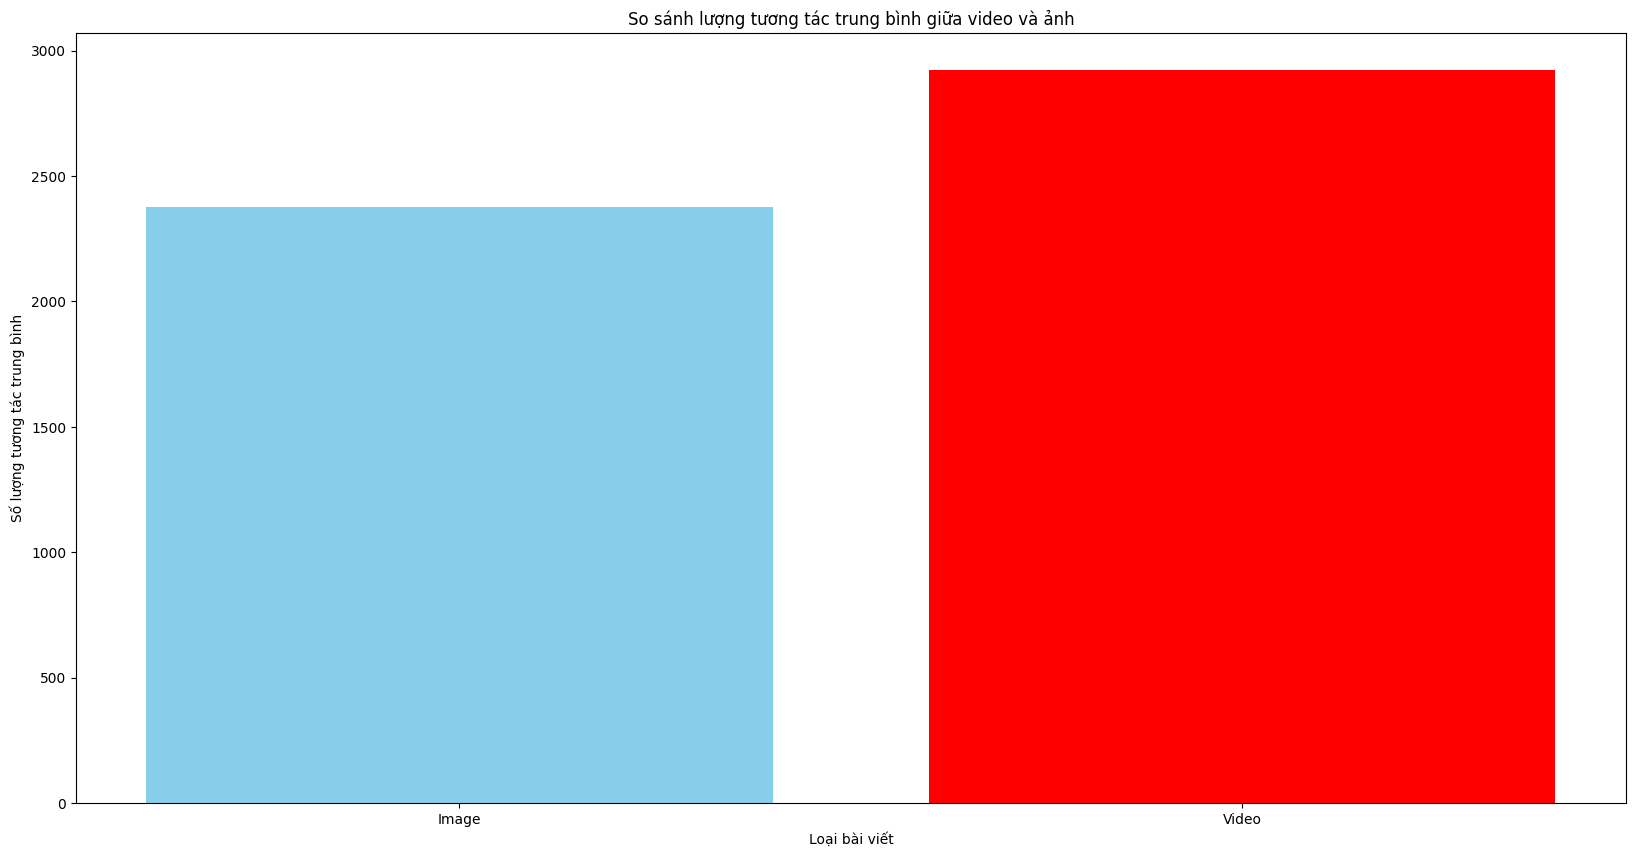

In [77]:

df_image_reactions = df_image_notna['reaction_count'].mean()
print(df_image_reactions)
df_video_reactions = df_video_notna['reaction_count'].mean()
print(df_video_reactions)

labels = ['Image', 'Video']
values = [df_image_reactions, df_video_reactions]

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(labels, values, color=['skyblue', 'red'])
plt.xlabel('Loại bài viết')
plt.ylabel('Số lượng tương tác trung bình')
plt.title('So sánh lượng tương tác trung bình giữa video và ảnh')
plt.show()

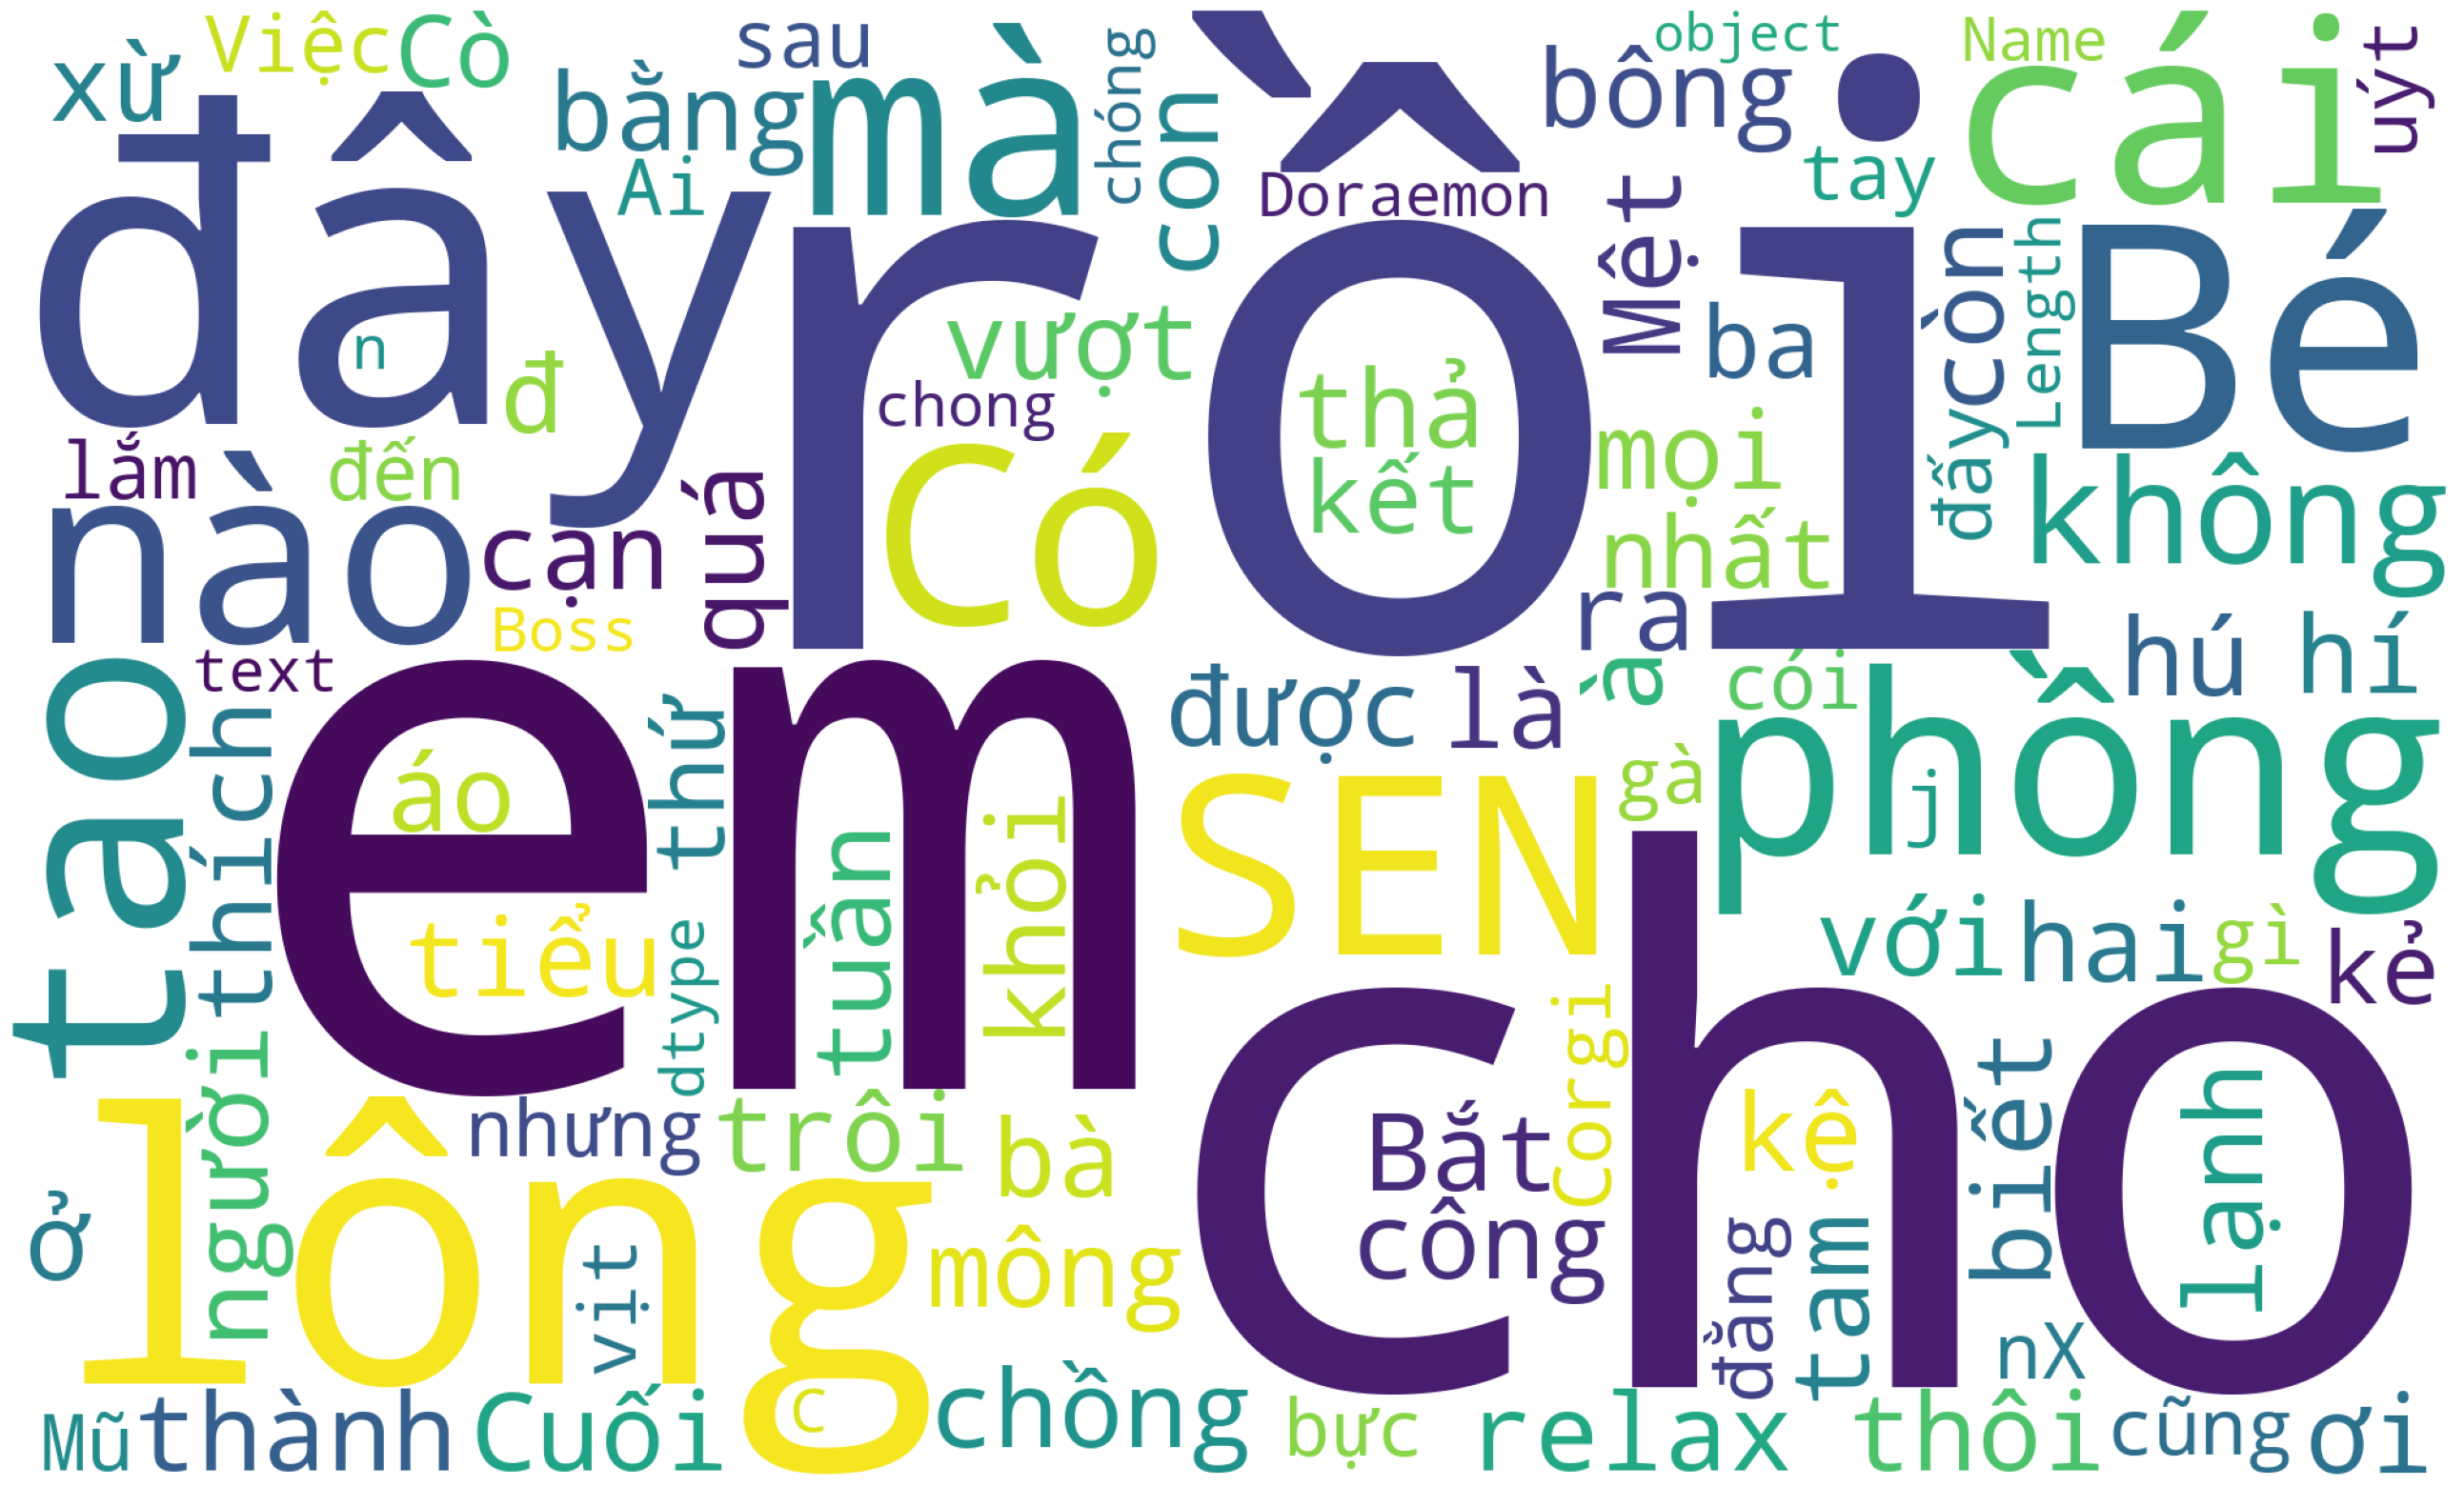

In [78]:
# phân tích nội dung bài viết(text, hashtag)
# tìm từ khóa xuất hiện nhiều nhất trong các bài đăng, hastag
from wordcloud import WordCloud, STOPWORDS

text = str(df['text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

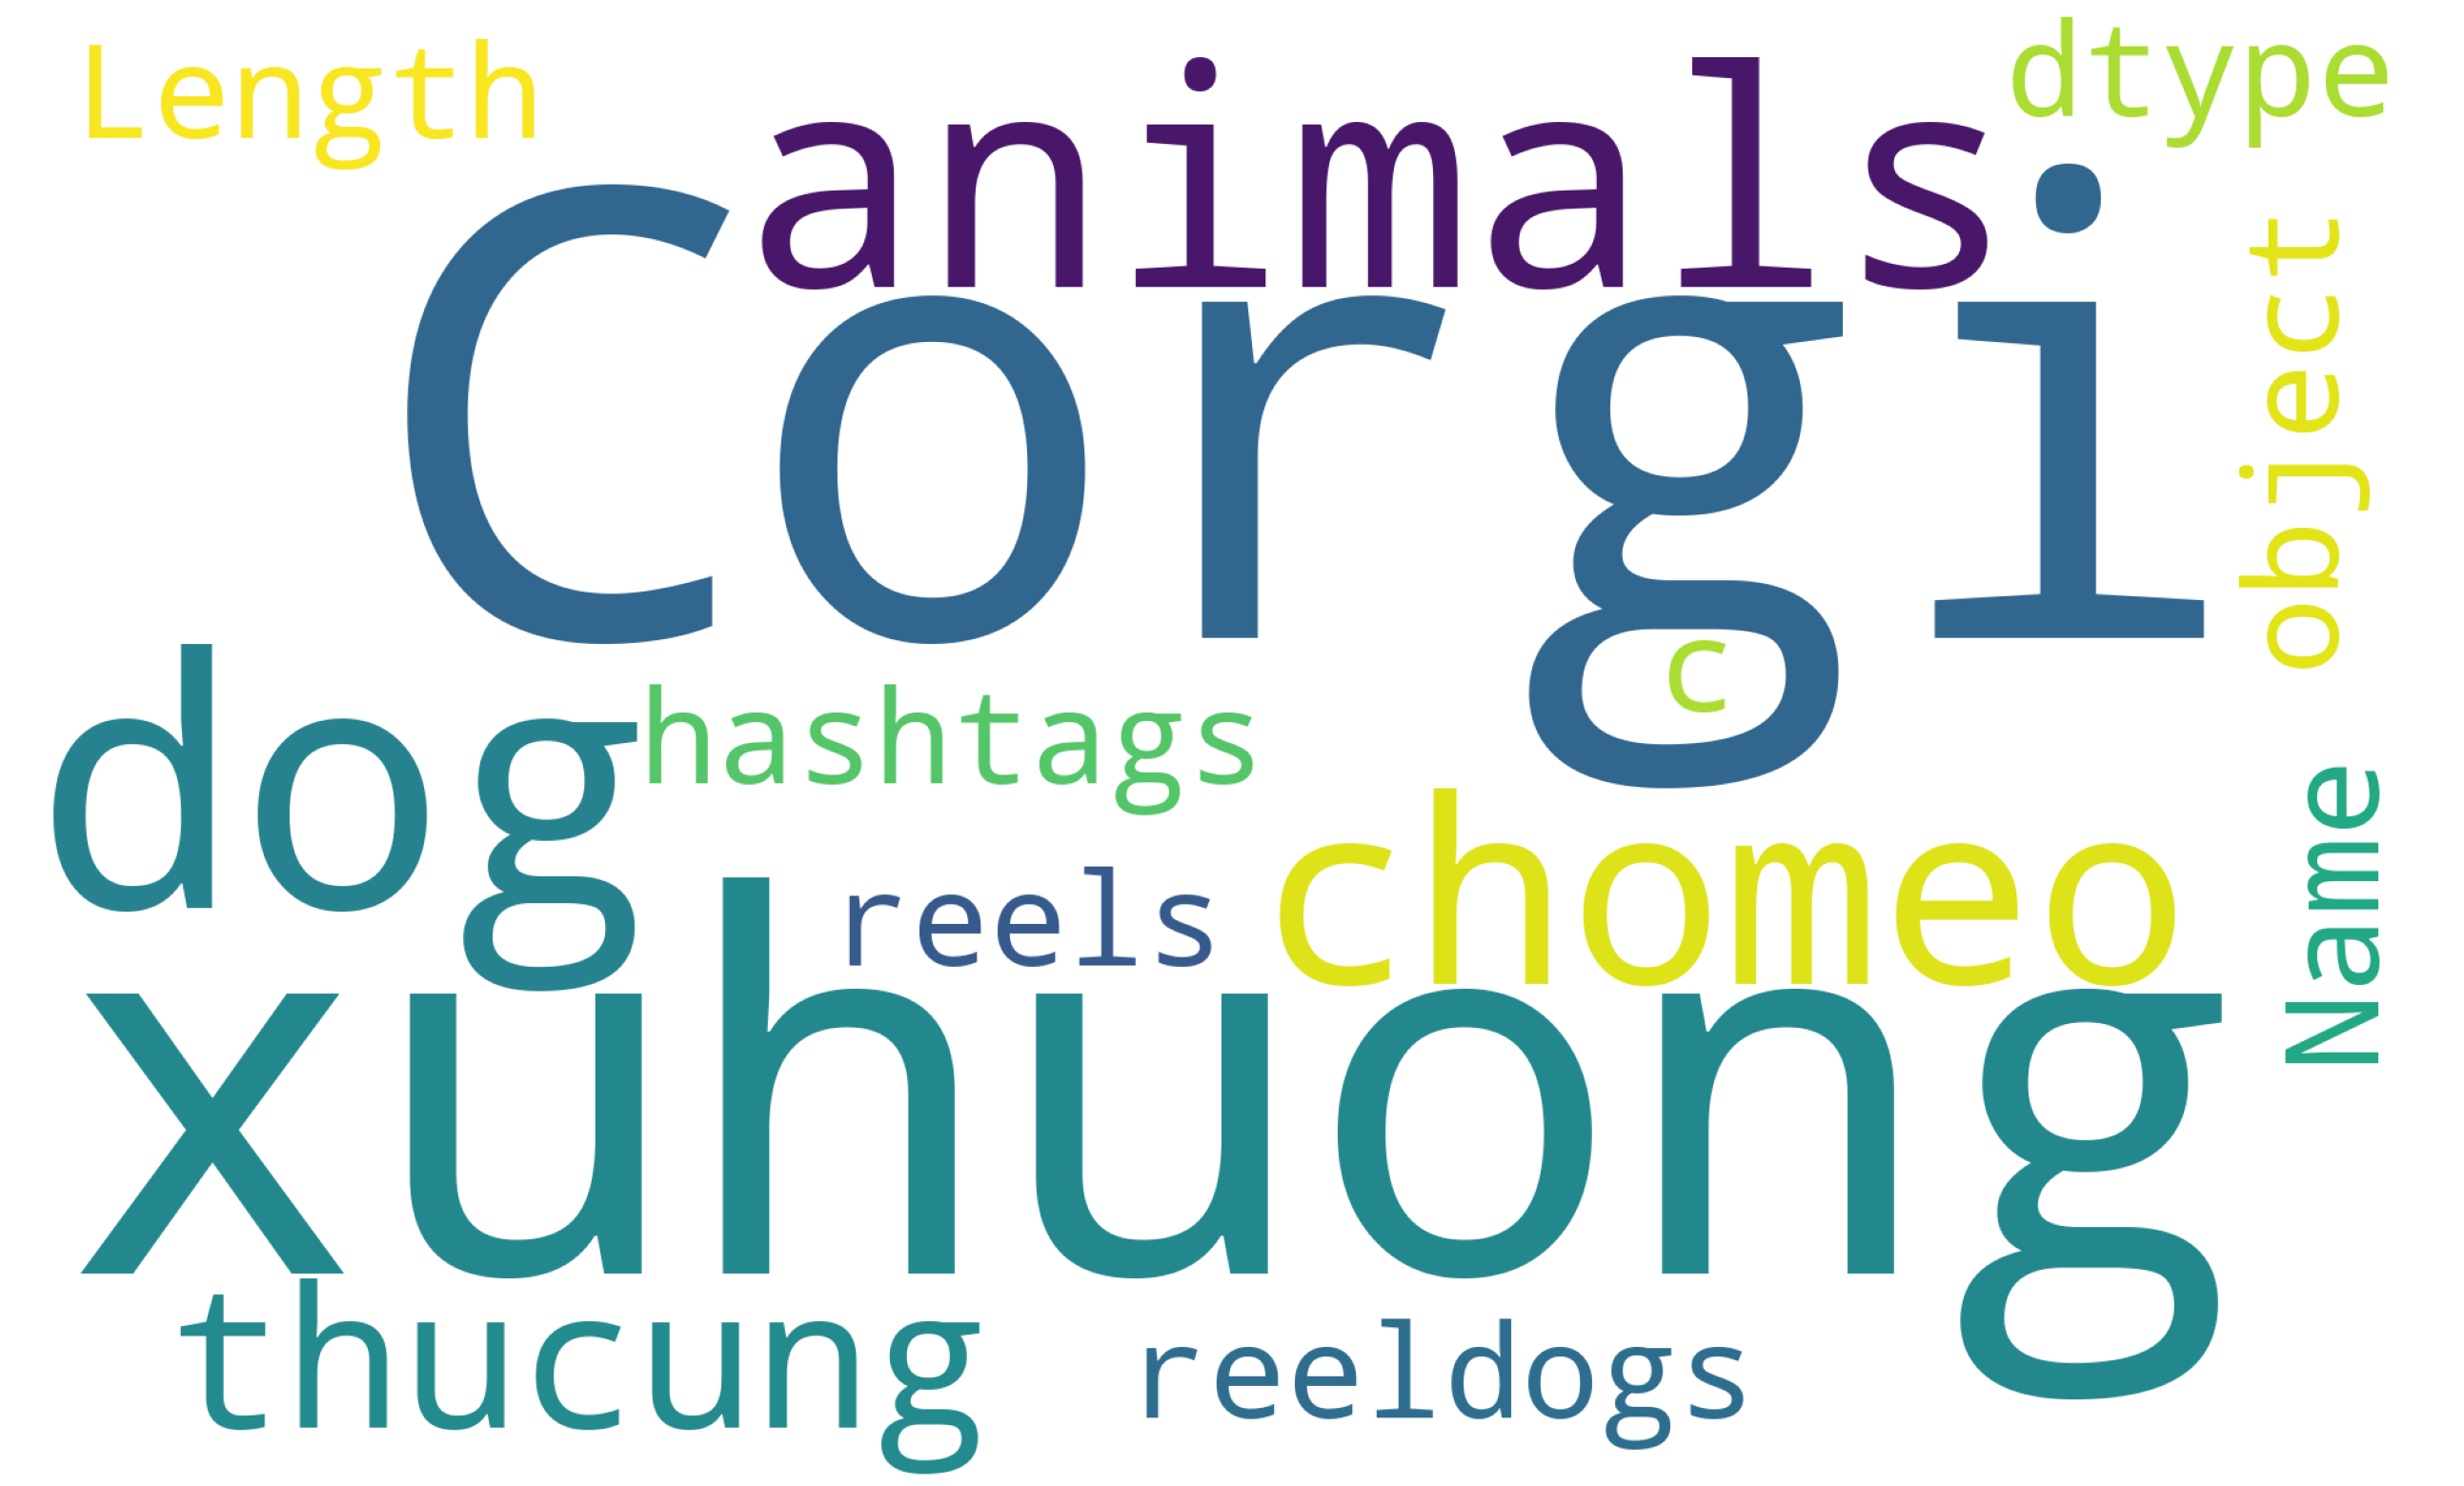

In [79]:
# phân tích hastag
# viết hàm lấy ra hastag
import pandas as pd
import re
# Hàm để trích xuất hashtag từ văn bản
def text_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    return hashtags
'''
#: Đây là ký tự thường dùng để bắt đầu một hashtag.
\w+: Điều này khớp với một hoặc nhiều ký tự chữ cái, số hoặc dấu gạch dưới. Nó biểu thị phần "word" trong hashtag.
'''

df['hashtags'] = df['text'].apply(text_hashtags)
# vẽ biểu đồ word hastags
hashtags = str(df['hashtags'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(hashtags)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()